<h2>Applying Recurrent Neural Networks/LSTM for Language Modeling</h2>

<h2>The Objective</h2>
Recurrent Networks are a specialized model to process sequential data by keeping track of the "state" or context. In this notebook, we go over a TensorFlow code snippet for creating a model focused on <b>Language Modelling</b> -- a very relevant task that is the cornerstone of many different linguistic problems such as <b>Speech Recognition, Machine Translation and Image Captioning</b>. For this, we will be using the Penn Treebank dataset, which is an often-used dataset for benchmarking Language Modelling models.

Created on JupyerLab


<h2>Table of Contents</h2>
<ol>
    <li><a href="#language_modelling">What exactly is Language Modelling?</a></li>
    <li><a href="#treebank_dataset">The Penn Treebank dataset</a></li>
    <li><a href="#word_embedding">Word Embedding</a></li>
    <li><a href="#building_lstm_model">Building the LSTM model for Language Modeling</a></li>
    <li><a href="#ltsm">LTSM</a></li>
</ol>
<p></p>
</div>
<br>


--------


<a id="language_modelling"></a>
<h2>What exactly is Language Modelling?</h2>
Language Modelling, to put it simply, <b>is the task of assigning probabilities to sequences of words</b>. This means that, given a context of one or a sequence of words in the language the model was trained on, the model should provide the next most probable words or sequence of words that follows from the given sequence of words the sentence. Language Modelling is one of the most important tasks in Natural Language Processing.

<img src="https://ibm.box.com/shared/static/1d1i5gub6wljby2vani2vzxp0xsph702.png" width="1080">
<center><i>Example of a sentence being predicted</i></center>
<br><br>
In this example, one can see the predictions for the next word of a sentence, given the context "This is an". As you can see, this boils down to a sequential data analysis task -- you are given a word or a sequence of words (the input data), and, given the context (the state), you need to find out what is the next word (the prediction). This kind of analysis is very important for language-related tasks such as <b>Speech Recognition, Machine Translation, Image Captioning, Text Correction</b> and many other very relevant problems. 

<img src="https://ibm.box.com/shared/static/az39idf9ipfdpc5ugifpgxnydelhyf3i.png" width="1080">
<center><i>The above example is a schema of an RNN in execution</i></center>
<br><br>
As the above image shows, Recurrent Network models fit this problem like a glove. Alongside LSTM and its capacity to maintain the model's state for over one thousand time steps, we have all the tools we need to undertake this problem. The goal for this notebook is to create a model that can reach <b>low levels of perplexity</b> on our desired dataset.

For Language Modelling problems, <b>perplexity</b> is the way to gauge efficiency. **Perplexity is simply a measure of how well a probabilistic model is able to predict its sample.** A higher-level way to explain this would be saying that <b>**low perplexity means a higher degree of trust in the predictions the model makes**</b>. Therefore, **the lower perplexity is, the better.**


The sequence of words forms the context and the most recent word is the input data. Using these two pieces of information, you need to output both a predicted word and a new context that contains the input word. Recurrent Neural Networks are a great fit for this type of problem. At the first time step, a recurrent net can receive a word as input along the initial contexts. It generates an output. The output word with a current sequence of words as the context will then be re-fed into the network in the second time step. A new word would be predicted and these steps are repeated until the sentence is complete.
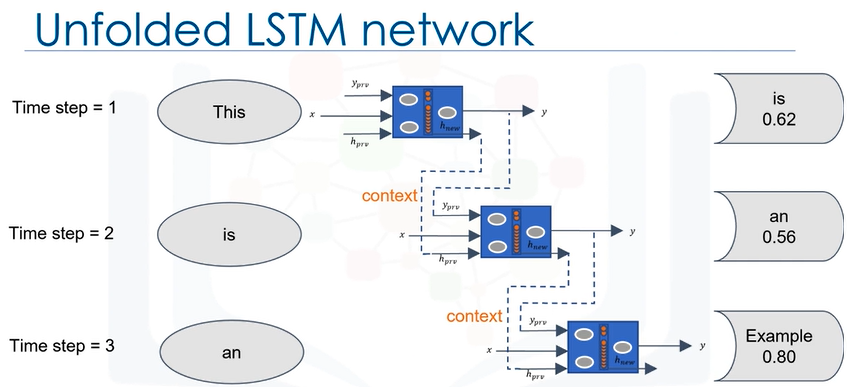

<a id="treebank_dataset"></a>
<h2>The Penn Treebank dataset</h2>
Historically, datasets big enough for Natural Language Processing are hard to come by. This is in part due to the necessity of the sentences to be broken down and tagged with a certain degree of correctness -- or else the models trained on it won't be able to be correct at all. This means that we need a <b>large amount of data, annotated by or at least corrected by humans</b>. This is, of course, not an easy task at all.

The Penn Treebank, or PTB for short, is a dataset maintained by the University of Pennsylvania. It is <i>huge</i> -- there are over <b>four million and eight hundred thousand</b> annotated words in it, all corrected by humans. It is composed of many different sources, from abstracts of Department of Energy papers to texts from the Library of America. Since it is verifiably correct and of such a huge size, the Penn Treebank is commonly used as a benchmark dataset for Language Modelling.

The dataset is divided in different kinds of annotations, such as Piece-of-Speech, Syntactic and Semantic skeletons. For this example, we will simply use a sample of clean, non-annotated words (with the exception of one tag --<code>&lt;unk&gt;</code>
, which is used for rare words such as uncommon proper nouns) for our model. This means that we just want to predict what the next words would be, not what they mean in context or their classes on a given sentence.

<center>Example of text from the dataset we are going to use, <b>ptb.train</b></center>
<br><br>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <center>the percentage of lung cancer deaths among the workers at the west <code>&lt;unk&gt;</code> mass. paper factory appears to be the highest for any asbestos workers studied in western industrialized countries he said 
 the plant which is owned by <code>&lt;unk&gt;</code> & <code>&lt;unk&gt;</code> co. was under contract with <code>&lt;unk&gt;</code> to make the cigarette filters 
 the finding probably will support those who argue that the U.S. should regulate the class of asbestos including <code>&lt;unk&gt;</code> more <code>&lt;unk&gt;</code> than the common kind of asbestos <code>&lt;unk&gt;</code> found in most schools and other buildings dr. <code>&lt;unk&gt;</code> said</center>
</div>


<a id="word_embedding"></a>
<h2>Word Embeddings</h2><br/>

For better processing, in this example, we will make use of <a href="https://www.tensorflow.org/tutorials/word2vec/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0120ENSkillsNetwork954-2023-01-01"><b>word embeddings</b></a>, **which is <b>a way of representing sentence structures or words as n-dimensional vectors (where n is a reasonably high number, such as 200 or 500) of real numbers</b>.** **Basically, we will assign each word a randomly-initialized vector, and input those into the network to be processed.** After a number of iterations, these vectors are expected to assume values that help the network to correctly predict what it needs to -- in our case, the probable next word in the sentence. This is shown to be a very effective task in Natural Language Processing, and is a commonplace practice.
<br><br>
<font size="4"><strong>
$$Vec("Example") = [0.02, 0.00, 0.00, 0.92, 0.30, \ldots]$$
</strong></font>
<br>
**Word Embedding tends to group up similarly used words <i>reasonably</i> close together in the vectorial space.** For example, if we use T-SNE (a dimensional reduction visualization algorithm) to flatten the dimensions of our vectors into a 2-dimensional space and plot these words in a 2-dimensional space, we might see something like this:

<img src="https://ibm.box.com/shared/static/bqhc5dg879gcoabzhxra1w8rkg3od1cu.png" width="800">
<center><i>T-SNE Mockup with clusters marked for easier visualization</i></center>

**As you can see, words that are frequently used together, in place of each other, or in the same places as them tend to be grouped together -- being closer together the higher they are correlated.** For example, "None" is pretty semantically close to "Zero", while a phrase that uses "Italy", you could probably also fit "Germany" in it, with little damage to the sentence structure. **The vectorial "closeness" for similar words like this is a great indicator of a well-built model.**

<hr>

In sum, a Word Embedding is an n-dimensional vector of real numbers for each word. The vector is typically large, for example 200 length. 

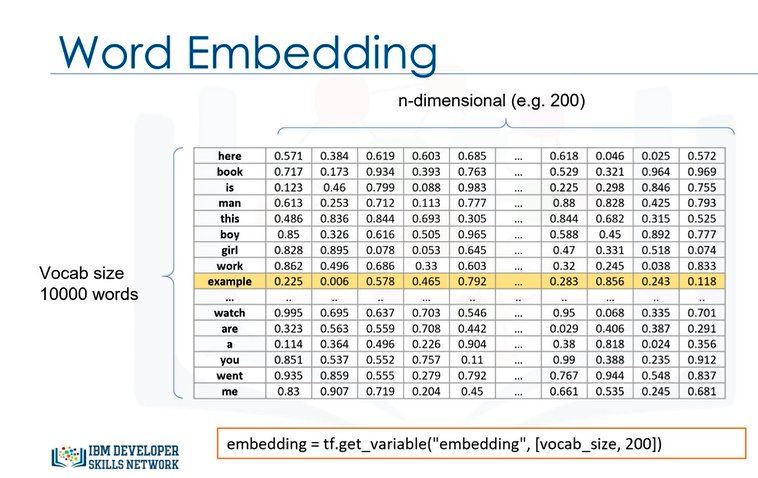

You can see what that might look like with the word *example* here. You think of Word Embedding as a type of encoding for text to numbers. Now, the question is how do we find the proper values for these vectors? 

**In our RNN model, the vectors also known as the matrix for the vocabulary are initialized randomly for all the words that we are going to use for training. Then, during the recurrent network's training, the vector values are updated based on the context into which the word is being inserted. So, words that are used in similar contexts end up with similar positions in the vector space. This can be visualized by utilizing a dimensionality reduction algorithm.**

After training the RNN, if we visualize the words based on their embedding vectors, the words are grouped together, either because they're synonyms or they're used in similar places within a sentence. For example, the words *zero* and *none* are close semantically, so it's natural for them to be placed close together. While Italy and Germany aren't synonyms, they can be interchanged in several sentences without distorting the grammar.

Now let's look back at the RNN that we have been using. Imagine that the input data is a batch with only one sequence of words. Think of it as a batch that includes one sentence only, **one that includes 20 words.** Assume that **the vocabulary size of the words is 10,000 words** and **the length of each embedding vector is 200.**

We have to look up those 20 words in the randomly initialized embedding matrix and **then feed them into the first LSTM unit.** Please notice that **only one word in each time step is fed into the network and one word would be the output.** **But during 20 time steps, the output would be 20 words.** In our network, we have **two LSTM units with arbitrary hidden sizes of 256 and 128.** So the **output of the second LSTM unit** would be a matrix of size **20 by 128.** 

Now, **we need a Softmax layer to calculate the probability of the output words.** It squashes that 128 dimensional vector of real values to a **10,000 dimensional vector, which is a vocabulary size.**
**This means that the output of the network at each time step as a probability vector of length 10,000. So the output word is the one with maximum probability value in the vector.**

Now, we can **compare the sequence of 20 output words with the ground truth words.** Finally, **calculate the discrepancy as a quantitative value, so-called loss value and back propagate the errors into the network, and of course, we will not train the model using only one sequence. We will use a batch of sequences to train it and calculate the error.** So instead of feeding one sequence, we can feed the network in **many iterations, perhaps even a batch of 60 sentences for example.**

Now, the key question to be asked is, what does the network learn when the error is propagated back in each iteration? Well, as previously noted, **the weights keep updating based on the error of the network in training.** First, the embedding matrix will be updated in each iteration. Second, there are a bunch of weight matrices related to the gates in the LSTM units, which will be changed. Finally, the weights related to the Softmax layer, which somehow plays the decoding role for the encoded words in the embedding layer.

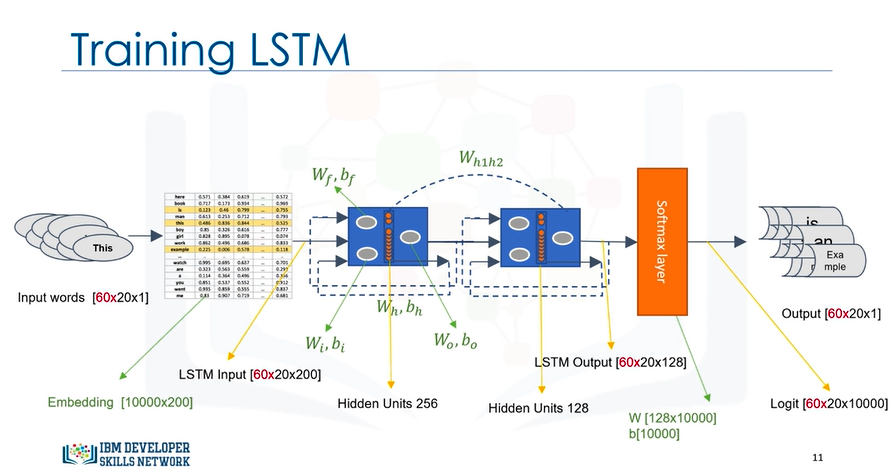

We need to import the necessary modules for our code. We need <b><code>numpy</code></b> and <b><code>tensorflow</code></b>, obviously. Additionally, we can import directly the <b><code>tensorflow.models.rnn</code></b> model, which includes the function for building RNNs, and <b><code>tensorflow.models.rnn.ptb.reader</code></b> which is the helper module for getting the input data from the dataset we just downloaded.

If you want to learn more take a look at https://github.com/tensorflow/models/blob/master/tutorials/rnn/ptb/reader.py


In [1]:
#!pip install tensorflow==2.9.0
#!pip install numpy==1.21.4

In [2]:
import time
import numpy as np
import tensorflow as tf
if not tf.__version__ == '2.9.0':
    print(tf.__version__)
    raise ValueError('please upgrade to TensorFlow 2.9.0, or restart your Kernel (Kernel->Restart & Clear Output)')

2024-05-24 07:32:14.457703: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-24 07:32:14.463802: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-05-24 07:32:14.463861: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


IMPORTANT! => Please restart the kernel by clicking on "Kernel"->"Restart and Clear Outout" and wait until all output disapears. Then your changes are beeing picked up


In [3]:
#!mkdir data
#!mkdir data/ptb
#!wget -q -O data/ptb/reader.py https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0120EN-SkillsNetwork/labs/Week3/data/ptb/reader.py
#!cp data/ptb/reader.py .

In [4]:
# Copyright 2015 The TensorFlow Authors. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================


"""Utilities for parsing PTB text files."""
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import collections
import os

import numpy as np
import tensorflow as tf


def _read_words(filename):
  with tf.io.gfile.GFile(filename, "r") as f:
    return f.read().replace("\n", "<eos>").split()


def _build_vocab(filename):
  data = _read_words(filename)

  counter = collections.Counter(data)
  count_pairs = sorted(counter.items(), key=lambda x: (-x[1], x[0]))

  words, _ = list(zip(*count_pairs))
  word_to_id = dict(zip(words, range(len(words))))

  return word_to_id


def _file_to_word_ids(filename, word_to_id):
  data = _read_words(filename)
  return [word_to_id[word] for word in data if word in word_to_id]


def ptb_raw_data(data_path=None):
  """Load PTB raw data from data directory "data_path".

  Reads PTB text files, converts strings to integer ids,
  and performs mini-batching of the inputs.

  The PTB dataset comes from Tomas Mikolov's webpage:

  http://www.fit.vutbr.cz/~imikolov/rnnlm/simple-examples.tgz

  Args:
    data_path: string path to the directory where simple-examples.tgz has
      been extracted.

  Returns:
    tuple (train_data, valid_data, test_data, vocabulary)
    where each of the data objects can be passed to PTBIterator.
  """

  train_path = os.path.join(data_path, "ptb.train.txt")
  valid_path = os.path.join(data_path, "ptb.valid.txt")
  test_path = os.path.join(data_path, "ptb.test.txt")

  word_to_id = _build_vocab(train_path)
  train_data = _file_to_word_ids(train_path, word_to_id)
  valid_data = _file_to_word_ids(valid_path, word_to_id)
  test_data = _file_to_word_ids(test_path, word_to_id)
  vocabulary = len(word_to_id)
  return train_data, valid_data, test_data, vocabulary, word_to_id


def ptb_iterator(raw_data, batch_size, num_steps):
  """Iterate on the raw PTB data.

  This generates batch_size pointers into the raw PTB data, and allows
  minibatch iteration along these pointers.

  Args:
    raw_data: one of the raw data outputs from ptb_raw_data.
    batch_size: int, the batch size.
    num_steps: int, the number of unrolls.

  Yields:
    Pairs of the batched data, each a matrix of shape [batch_size, num_steps].
    The second element of the tuple is the same data time-shifted to the
    right by one.

  Raises:
    ValueError: if batch_size or num_steps are too high.
  """
  raw_data = np.array(raw_data, dtype=np.int32)

  data_len = len(raw_data)
  batch_len = data_len // batch_size
  data = np.zeros([batch_size, batch_len], dtype=np.int32)
  for i in range(batch_size):
    data[i] = raw_data[batch_len * i:batch_len * (i + 1)]

  epoch_size = (batch_len - 1) // num_steps

  if epoch_size == 0:
    raise ValueError("epoch_size == 0, decrease batch_size or num_steps")

  for i in range(epoch_size):
    x = data[:, i*num_steps:(i+1)*num_steps]
    y = data[:, i*num_steps+1:(i+1)*num_steps+1]
    yield (x, y)

<a id="building_lstm_model"></a>
<h2>Building the LSTM model for Language Modeling</h2>
Now that we know exactly what we are doing, we can start building our model using TensorFlow. The very first thing we need to do is download and extract the <code>simple-examples</code> dataset, which can be done by executing the code cell below.


In [5]:
!wget http://www.fit.vutbr.cz/~imikolov/rnnlm/simple-examples.tgz 
!tar xzf simple-examples.tgz -C data/

--2024-05-24 07:32:17--  http://www.fit.vutbr.cz/~imikolov/rnnlm/simple-examples.tgz
Resolving www.fit.vutbr.cz (www.fit.vutbr.cz)... 147.229.9.23, 147.229.9.23
Connecting to www.fit.vutbr.cz (www.fit.vutbr.cz)|147.229.9.23|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34869662 (33M) [application/x-gtar]
Saving to: ‘simple-examples.tgz.6’

simple-examples.tgz 100%[===================>]  33.25M  9.32MB/s    in 4.7s    

2024-05-24 07:32:23 (7.11 MB/s) - ‘simple-examples.tgz.6’ saved [34869662/34869662]



Additionally, for the sake of making it easy to play around with the model's hyperparameters, we can declare them beforehand. Feel free to change these -- you will see a difference in performance each time you change those!  


In [6]:
#Initial weight scale
init_scale = 0.1
#Initial learning rate
learning_rate = 1.0
#Maximum permissible norm for the gradient (For gradient clipping -- another measure against Exploding Gradients)
max_grad_norm = 5
#The number of layers in our model
num_layers = 2
#The total number of recurrence steps, also known as the number of layers when our RNN is "unfolded"
num_steps = 20
#The number of processing units (neurons) in the hidden layers
hidden_size_l1 = 256
hidden_size_l2 = 128
#The maximum number of epochs trained with the initial learning rate
max_epoch_decay_lr = 4
#The total number of epochs in training
max_epoch = 15
#The probability for keeping data in the Dropout Layer (This is an optimization, but is outside our scope for this notebook!)
#At 1, we ignore the Dropout Layer wrapping.
keep_prob = 1
#The decay for the learning rate
decay = 0.5
#The size for each batch of data
batch_size = 30
#The size of our vocabulary
vocab_size = 10000
embeding_vector_size= 200
#Training flag to separate training from testing
is_training = 1
#Data directory for our dataset
data_dir = "data/simple-examples/data/"

Some clarifications for LSTM architecture based on the arguments:

Network structure:
<ul>
    <li>In this network, the number of LSTM cells are 2. To give the model more expressive power, we can add multiple layers of LSTMs to process the data. The output of the first layer will become the input of the second and so on.
    </li>
    <li>The recurrence steps is 20, that is, when our RNN is "Unfolded", the recurrence step is 20.</li>   
    <li>the structure is like:
        <ul>
            <li>200 input units -> [200x200] Weight -> 200 Hidden units (first layer) -> [200x200] Weight matrix  -> 200 Hidden units (second layer) ->  [200] weight Matrix -> 200 unit output</li>
        </ul>
    </li>
</ul>
<br>

Input layer: 
<ul>
    <li>The network has 200 input units.</li>
    <li>Suppose each word is represented by an embedding vector of dimensionality e=200. The input layer of each cell will have 200 linear units. These e=200 linear units are connected to each of the h=200 LSTM units in the hidden layer (assuming there is only one hidden layer, though our case has 2 layers).
    </li>
    <li>The input shape is [batch_size, num_steps], that is [30x20]. It will turn into [30x20x200] after embedding, and then 20x[30x200]
    </li>
</ul>
<br>

Hidden layer:
<ul>
    <li>Each LSTM has 200 hidden units which is equivalent to the dimensionality of the embedding words and output.</li>
</ul>
<br>


This code is adapted from the <a href="https://github.com/tensorflow/models">PTBModel</a> example bundled with the TensorFlow source code.


<h3>Training data</h3>
The story starts from data:
<ul>
    <li>Train data is a list of words, of size 929589, represented by numbers, e.g. [9971, 9972, 9974, 9975,...]</li>
    <li>We read data as mini-batch of size b=30. Assume the size of each sentence is 20 words (num_steps = 20). Then it will take $$floor(\frac{N}{b \times h})+1=1548$$ iterations for the learner to go through all sentences once. Where N is the size of the list of words, b is batch size, and h is size of each sentence. So, the number of iterators is 1548
    </li>
    <li>Each batch data is read from train dataset of size 600, and shape of [30x20]</li>
</ul>


In [7]:
# Reads the data and separates it into training data, validation data and testing data
raw_data = ptb_raw_data(data_dir)
train_data, valid_data, test_data, vocab, word_to_id = raw_data

In [8]:
len(train_data)

929589

In [9]:
def id_to_word(id_list):
    line = []
    for w in id_list:
        for word, wid in word_to_id.items():
            if wid == w:
                line.append(word)
    return line            
                

print(id_to_word(train_data[0:100]))

['aer', 'banknote', 'berlitz', 'calloway', 'centrust', 'cluett', 'fromstein', 'gitano', 'guterman', 'hydro-quebec', 'ipo', 'kia', 'memotec', 'mlx', 'nahb', 'punts', 'rake', 'regatta', 'rubens', 'sim', 'snack-food', 'ssangyong', 'swapo', 'wachter', '<eos>', 'pierre', '<unk>', 'N', 'years', 'old', 'will', 'join', 'the', 'board', 'as', 'a', 'nonexecutive', 'director', 'nov.', 'N', '<eos>', 'mr.', '<unk>', 'is', 'chairman', 'of', '<unk>', 'n.v.', 'the', 'dutch', 'publishing', 'group', '<eos>', 'rudolph', '<unk>', 'N', 'years', 'old', 'and', 'former', 'chairman', 'of', 'consolidated', 'gold', 'fields', 'plc', 'was', 'named', 'a', 'nonexecutive', 'director', 'of', 'this', 'british', 'industrial', 'conglomerate', '<eos>', 'a', 'form', 'of', 'asbestos', 'once', 'used', 'to', 'make', 'kent', 'cigarette', 'filters', 'has', 'caused', 'a', 'high', 'percentage', 'of', 'cancer', 'deaths', 'among', 'a', 'group', 'of']


Lets just read one mini-batch now and feed our network:


In [10]:
itera = ptb_iterator(train_data, batch_size, num_steps)
first_touple = itera.__next__()
_input_data = first_touple[0]
_targets = first_touple[1]

In [11]:
_input_data.shape

(30, 20)

In [12]:
_targets.shape

(30, 20)

Lets look at 3 sentences of our input x:


In [13]:
_input_data[0:3]

array([[9970, 9971, 9972, 9974, 9975, 9976, 9980, 9981, 9982, 9983, 9984,
        9986, 9987, 9988, 9989, 9991, 9992, 9993, 9994, 9995],
       [2654,    6,  334, 2886,    4,    1,  233,  711,  834,   11,  130,
         123,    7,  514,    2,   63,   10,  514,    8,  605],
       [   0, 1071,    4,    0,  185,   24,  368,   20,   31, 3109,  954,
          12,    3,   21,    2, 2915,    2,   12,    3,   21]],
      dtype=int32)

In [14]:
print(id_to_word(_input_data[0,:]))

['aer', 'banknote', 'berlitz', 'calloway', 'centrust', 'cluett', 'fromstein', 'gitano', 'guterman', 'hydro-quebec', 'ipo', 'kia', 'memotec', 'mlx', 'nahb', 'punts', 'rake', 'regatta', 'rubens', 'sim']


<h3>Embeddings</h3>
We have to convert the words in our dataset to vectors of numbers. The traditional approach is to use one-hot encoding method that is usually used for converting categorical values to numerical values. However, One-hot encoded vectors are high-dimensional, sparse and in a big dataset, computationally inefficient. So, we use word2vec approach. It is, in fact, a layer in our LSTM network, where the word IDs will be represented as a dense representation before feeding to the LSTM. 

The embedded vectors also get updated during the training process of the deep neural network.
We create the embeddings for our input data. <b>embedding_vocab</b> is matrix of [10000x200] for all 10000 unique words.


<b>embedding_lookup()</b> finds the embedded values for our batch of 30x20 words. It  goes to each row of <code>input_data</code>, and for each word in the row/sentence, finds the correspond vector in <code>embedding_dic<code>. <br>
It creates a [30x20x200] tensor, so, the first element of <b>inputs</b> (the first sentence), is a matrix of 20x200, which each row of it, is vector representing a word in the sentence.


In [15]:
embedding_layer = tf.keras.layers.Embedding(vocab_size, embeding_vector_size,batch_input_shape=(batch_size, num_steps),trainable=True,name="embedding_vocab")  

In [16]:
# Define where to get the data for our embeddings from
inputs = embedding_layer(_input_data)
inputs

2024-05-24 07:32:41.571833: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-05-24 07:32:41.571912: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2024-05-24 07:32:41.571951: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jupyterlab-mathildeduvi): /proc/driver/nvidia/version does not exist
2024-05-24 07:32:41.572752: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


<tf.Tensor: shape=(30, 20, 200), dtype=float32, numpy=
array([[[-1.49707906e-02,  5.38178533e-03, -6.67852163e-03, ...,
         -1.94302686e-02, -4.16717306e-02,  1.97207928e-03],
        [ 3.74056138e-02, -4.47807796e-02, -4.70420606e-02, ...,
          4.46729325e-02, -2.23738793e-02, -1.07665882e-02],
        [-7.31766224e-03, -6.49178028e-03, -4.68126647e-02, ...,
         -3.57979536e-03, -1.68513507e-04, -3.58303562e-02],
        ...,
        [ 3.54414061e-03, -1.76353082e-02,  3.02744992e-02, ...,
          1.40910633e-02, -1.98392514e-02,  1.59478821e-02],
        [-4.71248887e-02,  4.18930762e-02, -2.38223318e-02, ...,
          2.59345211e-02,  4.28702496e-02,  1.80087946e-02],
        [-2.23864913e-02,  4.47431840e-02,  2.23970674e-02, ...,
         -2.74322759e-02,  4.79324944e-02, -4.44403067e-02]],

       [[-1.94406267e-02, -7.72102922e-03,  2.29607895e-03, ...,
         -4.99670878e-02,  2.87812240e-02,  3.52482907e-02],
        [-5.41709736e-03,  4.19215076e-02,  1.43

<h3>Constructing Recurrent Neural Networks</h3>


In this step, we create the stacked LSTM using <b>tf.keras.layers.StackedRNNCells</b>, which is a 2 layer LSTM network:


In [17]:
lstm_cell_l1 = tf.keras.layers.LSTMCell(hidden_size_l1)
lstm_cell_l2 = tf.keras.layers.LSTMCell(hidden_size_l2)

In [18]:
stacked_lstm = tf.keras.layers.StackedRNNCells([lstm_cell_l1, lstm_cell_l2])

<b>**tf.keras.layers.RNN</b> creates a recurrent neural network using <b>stacked_lstm**</b>. 

The input should be a Tensor of shape: [batch_size, max_time, embedding_vector_size], in our case it would be (30, 20, 200)


In [19]:
layer  =  tf.keras.layers.RNN(stacked_lstm,[batch_size, num_steps],return_state=False,stateful=True,trainable=True)

Also, we initialize the states of the nework:

<h4>_initial_state</h4>

For each LSTM, there are 2 state matrices, c\_state and m\_state.  c_state and m_state represent "Memory State" and "Cell State". Each hidden layer, has a vector of size 30, which keeps the states. so, for 200 hidden units in each LSTM, we have a matrix of size [30x200]


In [20]:
init_state = tf.Variable(tf.zeros([batch_size,embeding_vector_size]),trainable=False)

In [21]:
layer.inital_state = init_state

In [22]:
layer.inital_state

<tf.Variable 'Variable:0' shape=(30, 200) dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

so, lets look at the outputs. The output of the stackedLSTM comes from 128 hidden_layer, and in each time step(=20), one of them get activated. we use the linear activation to map the 128 hidden layer to a [30X20 matrix]


In [23]:
outputs = layer(inputs)

In [24]:
outputs

<tf.Tensor: shape=(30, 20, 128), dtype=float32, numpy=
array([[[ 3.98972013e-04, -3.24883615e-04,  1.39436277e-04, ...,
          4.37740935e-04,  5.47910924e-04,  1.67856261e-03],
        [ 9.08698654e-04, -1.81250600e-03,  4.16038412e-04, ...,
         -9.90007189e-04,  1.19946571e-03,  3.04066390e-03],
        [ 2.93977489e-03, -3.13962880e-03,  2.18234777e-06, ...,
         -1.38931896e-03,  1.64805131e-03,  4.96839732e-03],
        ...,
        [ 4.46141558e-03, -3.33527545e-03, -5.91992075e-03, ...,
          7.56060763e-04,  7.05041690e-03,  7.65108876e-03],
        [ 5.25824260e-03, -2.21831957e-03, -6.24949671e-03, ...,
          1.11821946e-03,  7.49122538e-03,  7.19130784e-03],
        [ 5.66798775e-03, -6.27889938e-04, -5.42882038e-03, ...,
          1.23760127e-03,  7.14507280e-03,  6.71417266e-03]],

       [[ 3.13355966e-04, -4.84293501e-04,  1.05029054e-03, ...,
          8.35961895e-04,  8.17746797e-04, -6.94340502e-04],
        [ 7.75108056e-04, -1.70487154e-03,  1.46

<h2>Dense layer</h2>
We now create densely-connected neural network layer that would reshape the outputs tensor from  [30 x 20 x 128] to [30 x 20 x 10000].


In [25]:
dense = tf.keras.layers.Dense(vocab_size)

In [26]:
logits_outputs  = dense(outputs)

In [27]:
print("shape of the output from dense layer: ", logits_outputs.shape) #(batch_size, sequence_length, vocab_size)

shape of the output from dense layer:  (30, 20, 10000)


<h2>Activation layer</h2>


A softmax activation layers is also then applied to derive the probability of the output being in any of the multiclass(10000 in this case) possibilities. 


In [28]:
activation = tf.keras.layers.Activation('softmax')

In [29]:
output_words_prob = activation(logits_outputs)

In [30]:
output_words_prob.shape

TensorShape([30, 20, 10000])

In [31]:
print("shape of the output from the activation layer: ", output_words_prob.shape) #(batch_size, sequence_length, vocab_size)

shape of the output from the activation layer:  (30, 20, 10000)


Lets look at the probability of observing words for t=0 to t=20 (first batch):
 for each word, 1000 probabilities (one per word in the dictionnary)

In [32]:
print("The probability of observing words in t=0 to t=20", output_words_prob[0,0:num_steps])

The probability of observing words in t=0 to t=20 tf.Tensor(
[[1.00004778e-04 9.99826952e-05 9.99933400e-05 ... 1.00002988e-04
  1.00009784e-04 1.00005695e-04]
 [1.00005578e-04 9.99789045e-05 1.00004348e-04 ... 1.00008168e-04
  9.99949261e-05 9.99819022e-05]
 [1.00009609e-04 9.99862605e-05 1.00005280e-04 ... 1.00028788e-04
  9.99894473e-05 9.99625699e-05]
 ...
 [9.99426920e-05 1.00037469e-04 1.00008379e-04 ... 9.99593467e-05
  9.99650947e-05 1.00037643e-04]
 [9.99439435e-05 1.00022815e-04 1.00009849e-04 ... 9.99361437e-05
  9.99467811e-05 1.00047742e-04]
 [9.99297336e-05 1.00010388e-04 1.00004298e-04 ... 9.99351978e-05
  9.99327967e-05 1.00054349e-04]], shape=(20, 10000), dtype=float32)


<h3>Prediction</h3>
What is the word that corresponds to the probability output? Lets use the maximum probability:

Most likely across the 1000 words of the dictionnary.

In [33]:
words_pred = np.argmax(output_words_prob[0,0:num_steps], axis=1)
words_pred

array([4442, 6173, 1360, 1360, 5445, 5445, 1263, 1360, 1360, 1800, 8212,
       8212,  146,  146, 2544, 4660, 4660, 4660, 6934, 6934])

In [34]:
print(id_to_word(words_pred))

['column', 'prof.', 'passed', 'passed', 'lobbyist', 'lobbyist', 'cable', 'passed', 'passed', 'ready', 'lubricants', 'lubricants', 'board', 'board', 'introduce', 'crops', 'crops', 'crops', 'hailed', 'hailed']


So, what is the ground truth for the first word of first sentence? You can get it from target tensor, if you want to find the embedding vector: 


In [35]:
_targets[0]

array([9971, 9972, 9974, 9975, 9976, 9980, 9981, 9982, 9983, 9984, 9986,
       9987, 9988, 9989, 9991, 9992, 9993, 9994, 9995, 9996], dtype=int32)

In [36]:
print(id_to_word(_targets[0]))

['banknote', 'berlitz', 'calloway', 'centrust', 'cluett', 'fromstein', 'gitano', 'guterman', 'hydro-quebec', 'ipo', 'kia', 'memotec', 'mlx', 'nahb', 'punts', 'rake', 'regatta', 'rubens', 'sim', 'snack-food']


<h4>Objective function</h4>


How similar the predicted words are to the target words?


Now we have to define our objective function, to calculate the similarity of predicted values to ground truth, and then, penalize the model with the error. Our objective is to minimize loss function, that is, to minimize the average negative log probability of the target words:

$$\text{loss} = -\frac{1}{N}\sum_{i=1}^{N} \ln p_{\text{target}_i}$$

This function is already implemented and available in TensorFlow through *tf.keras.losses.sparse_categorical_crossentropy*. It calculates the categorical cross-entropy loss for <b>logits</b> and the <b>target</b> sequence.  

The arguments of this function are:  
<ul>
    <li>logits: List of 2D Tensors of shape [batch_size x num_decoder_symbols].</li>  
    <li>targets: List of 1D batch-sized int32 Tensors of the same length as logits.</li>   
</ul>


In [37]:
def crossentropy(y_true, y_pred):
    return tf.keras.losses.sparse_categorical_crossentropy(y_true, y_pred)

In [38]:
loss  = crossentropy(_targets, output_words_prob)

Lets look at the first 10 values of loss:


In [39]:
loss[0,:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([9.210443 , 9.210389 , 9.210133 , 9.210294 , 9.210607 , 9.210931 ,
       9.210765 , 9.2094555, 9.210026 , 9.210965 ], dtype=float32)>

Now, we define cost as average of the losses:


In [40]:
cost = tf.reduce_sum(loss / batch_size)
cost

<tf.Tensor: shape=(), dtype=float32, numpy=184.20703>

<h3>Training</h3>

To do training for our network, we have to take the following steps:
<ol>
    <li>Define the optimizer.</li>
    <li>Assemble layers to build model.</li>
    <li>Calculate the gradients based on the loss function.</li>
    <li>Apply the optimizer to the variables/gradients tuple.</li>
</ol>


<h4>1. Define Optimizer</h4>



In [41]:
# Create a variable for the learning rate
lr = tf.Variable(0.0, trainable=False)
optimizer = tf.keras.optimizers.SGD(learning_rate=lr, clipnorm=max_grad_norm)

<h4>2. Assemble layers to build model.</h4>


In [42]:
model = tf.keras.Sequential()
model.add(embedding_layer)
model.add(layer)
model.add(dense)
model.add(activation)
model.compile(loss=crossentropy, optimizer=optimizer)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_vocab (Embedding)  (30, 20, 200)            2000000   
                                                                 
 rnn (RNN)                   (30, 20, 128)             671088    
                                                                 
 dense (Dense)               (30, 20, 10000)           1290000   
                                                                 
 activation (Activation)     (30, 20, 10000)           0         
                                                                 
Total params: 3,961,088
Trainable params: 3,955,088
Non-trainable params: 6,000
_________________________________________________________________



<h4>2. Trainable Variables</h4>


Defining a variable, if you passed <i>trainable=True</i>, the variable constructor automatically adds new variables to the graph collection <b>GraphKeys.TRAINABLE_VARIABLES</b>. Now, using <i>tf.trainable_variables()</i> you can get all variables created with <b>trainable=True</b>.


In [43]:
# Get all TensorFlow variables marked as "trainable" (i.e. all of them except _lr, which we just created)
tvars = model.trainable_variables

Note: we can find the name and scope of all variables:


In [44]:
[v.name for v in tvars] 

['embedding_vocab/embeddings:0',
 'rnn/stacked_rnn_cells/lstm_cell/kernel:0',
 'rnn/stacked_rnn_cells/lstm_cell/recurrent_kernel:0',
 'rnn/stacked_rnn_cells/lstm_cell/bias:0',
 'rnn/stacked_rnn_cells/lstm_cell_1/kernel:0',
 'rnn/stacked_rnn_cells/lstm_cell_1/recurrent_kernel:0',
 'rnn/stacked_rnn_cells/lstm_cell_1/bias:0',
 'dense/kernel:0',
 'dense/bias:0']

<h4>3. Calculate the gradients based on the loss function</h4>


**Gradient**: The gradient of a function is the slope of its derivative (line), or in other words, the rate of change of a function. It's a vector (a direction to move) that points in the direction of greatest increase of the function, and calculated by the <b>derivative</b> operation.


First lets recall the gradient function using an toy example:
$$ z = \left(2x^2 + 3xy\right)$$


In [45]:
x = tf.constant(1.0)
y =  tf.constant(2.0)
with tf.GradientTape(persistent=True) as g:
    g.watch(x)
    g.watch(y)
    func_test = 2 * x * x + 3 * x * y

The <b>tf.gradients()</b> function allows you to compute the symbolic gradient of one tensor with respect to one or more other tensors—including variables. <b>tf.gradients(func, xs)</b> constructs symbolic partial derivatives of sum of <b>func</b> w.r.t. <i>x</i> in <b>xs</b>. 

Now, lets look at the derivitive w.r.t. <b>var_x</b>:
$$ \frac{\partial \:}{\partial \:x}\left(2x^2 + 3xy\right) = 4x + 3y $$


In [46]:
var_grad = g.gradient(func_test, x) # Will compute to 10.0
print(var_grad)

tf.Tensor(10.0, shape=(), dtype=float32)


the derivative w.r.t. <b>var_y</b>:
$$ \frac{\partial \:}{\partial \:y}\left(2x^2 + 3xy\right) = 3x $$


In [47]:
var_grad = g.gradient(func_test, y) # Will compute to 3.0
print(var_grad)

tf.Tensor(3.0, shape=(), dtype=float32)


Now, we can look at gradients w.r.t all variables:


In [48]:
with tf.GradientTape() as tape:
    # Forward pass.
    output_words_prob = model(_input_data)
    # Loss value for this batch.
    loss  = crossentropy(_targets, output_words_prob)
    cost = tf.reduce_sum(loss,axis=0) / batch_size

In [49]:
# Get gradients of loss wrt the trainable variables.
grad_t_list = tape.gradient(cost, tvars)

In [50]:
print(grad_t_list)

[<tensorflow.python.framework.indexed_slices.IndexedSlices object at 0x7f8d89502f50>, <tf.Tensor: shape=(200, 1024), dtype=float32, numpy=
array([[ 2.91566948e-09, -1.06713912e-07, -6.02608566e-07, ...,
         1.54288884e-07,  6.73811655e-08, -1.58908307e-07],
       [ 2.82572671e-07, -3.25115167e-07,  9.03295785e-08, ...,
        -2.08330050e-07,  1.09390115e-07, -6.53377526e-07],
       [-6.47504407e-07,  1.00850954e-07,  5.39669259e-07, ...,
         3.38197822e-07, -1.27664009e-07, -4.08838844e-07],
       ...,
       [-1.56591256e-07,  3.97478033e-08,  4.58209286e-07, ...,
         1.15946968e-07,  3.30604308e-08, -2.67116349e-07],
       [-4.37108952e-07, -5.22484243e-07,  4.42427222e-07, ...,
         4.60641701e-07,  3.20872232e-07, -1.14021915e-07],
       [-3.16484090e-07,  5.18981892e-07,  2.73768421e-08, ...,
        -1.25576065e-07,  1.16187110e-07,  5.03616661e-07]], dtype=float32)>, <tf.Tensor: shape=(256, 1024), dtype=float32, numpy=
array([[ 6.86578971e-08, -1.063177




now, we have a list of tensors, t-list. We can use it to find clipped tensors. <b>clip_by_global_norm</b> clips values of multiple tensors by the ratio of the sum of their norms.

<b>clip_by_global_norm</b> get <i>t-list</i> as input and returns 2 things:
<ul>
    <li>a list of clipped tensors, so called <i>list_clipped</i></li> 
    <li>the global norm (global_norm) of all tensors in t_list</li> 
</ul>


In [51]:
# Define the gradient clipping threshold
grads, _ = tf.clip_by_global_norm(grad_t_list, max_grad_norm)
grads

 <tf.Tensor: shape=(200, 1024), dtype=float32, numpy=
 array([[ 2.91566948e-09, -1.06713912e-07, -6.02608566e-07, ...,
          1.54288884e-07,  6.73811655e-08, -1.58908307e-07],
        [ 2.82572671e-07, -3.25115167e-07,  9.03295785e-08, ...,
         -2.08330050e-07,  1.09390115e-07, -6.53377526e-07],
        [-6.47504407e-07,  1.00850954e-07,  5.39669259e-07, ...,
          3.38197822e-07, -1.27664009e-07, -4.08838844e-07],
        ...,
        [-1.56591256e-07,  3.97478033e-08,  4.58209286e-07, ...,
          1.15946968e-07,  3.30604308e-08, -2.67116349e-07],
        [-4.37108952e-07, -5.22484243e-07,  4.42427222e-07, ...,
          4.60641701e-07,  3.20872232e-07, -1.14021915e-07],
        [-3.16484090e-07,  5.18981892e-07,  2.73768421e-08, ...,
         -1.25576065e-07,  1.16187110e-07,  5.03616661e-07]], dtype=float32)>,
 <tf.Tensor: shape=(256, 1024), dtype=float32, numpy=
 array([[ 6.86578971e-08, -1.06317756e-07,  1.57273718e-07, ...,
          8.96402170e-08, -6.43866755e-0

<h4> 4.Apply the optimizer to the variables/gradients tuple. </h4>


In [52]:
# Create the training TensorFlow Operation through our optimizer
train_op = optimizer.apply_gradients(zip(grads, tvars))

<a id="ltsm"></a>
<h2>LSTM</h2>


We learned how the model is build step by step. Now, let's then create a Class that represents our model. This class needs a few things:
<ul>
    <li>We have to create the model in accordance with our defined hyperparameters</li>
    <li>We have to create the LSTM cell structure and connect them with our RNN structure</li>
    <li>We have to create the word embeddings and point them to the input data</li>
    <li>We have to create the input structure for our RNN</li>
    <li>We need to create a logistic structure to return the probability of our words</li>
    <li>We need to create the loss and cost functions for our optimizer to work, and then create the optimizer</li>
    <li>And finally, we need to create a training operation that can be run to actually train our model</li>
</ul>


In [53]:
class PTBModel(object):


    def __init__(self):
        ######################################
        # Setting parameters for ease of use #
        ######################################
        self.batch_size = batch_size
        self.num_steps = num_steps
        self.hidden_size_l1 = hidden_size_l1
        self.hidden_size_l2 = hidden_size_l2
        self.vocab_size = vocab_size
        self.embeding_vector_size = embeding_vector_size
        # Create a variable for the learning rate
        self._lr = 1.0
        
        ###############################################################################
        # Initializing the model using keras Sequential API  #
        ###############################################################################
        
        self._model = tf.keras.models.Sequential()
        
        ####################################################################
        # Creating the word embeddings layer and adding it to the sequence #
        ####################################################################
        with tf.device("/cpu:0"):
            # Create the embeddings for our input data. Size is hidden size.
            self._embedding_layer = tf.keras.layers.Embedding(self.vocab_size, self.embeding_vector_size,batch_input_shape=(self.batch_size, self.num_steps),trainable=True,name="embedding_vocab")  #[10000x200]
            self._model.add(self._embedding_layer)
            

        ##########################################################################
        # Creating the LSTM cell structure and connect it with the RNN structure #
        ##########################################################################
        # Create the LSTM Cells. 
        # This creates only the structure for the LSTM and has to be associated with a RNN unit still.
        # The argument  of LSTMCell is size of hidden layer, that is, the number of hidden units of the LSTM (inside A). 
        # LSTM cell processes one word at a time and computes probabilities of the possible continuations of the sentence.
        lstm_cell_l1 = tf.keras.layers.LSTMCell(hidden_size_l1)
        lstm_cell_l2 = tf.keras.layers.LSTMCell(hidden_size_l2)
        

        
        # By taking in the LSTM cells as parameters, the StackedRNNCells function junctions the LSTM units to the RNN units.
        # RNN cell composed sequentially of stacked simple cells.
        stacked_lstm = tf.keras.layers.StackedRNNCells([lstm_cell_l1, lstm_cell_l2])

        
        ############################################
        # Creating the input structure for our RNN #
        ############################################
        # Input structure is 20x[30x200]
        # Considering each word is represended by a 200 dimentional vector, and we have 30 batchs, we create 30 word-vectors of size [30xx2000]
        # The input structure is fed from the embeddings, which are filled in by the input data
        # Feeding a batch of b sentences to a RNN:
        # In step 1,  first word of each of the b sentences (in a batch) is input in parallel.  
        # In step 2,  second word of each of the b sentences is input in parallel. 
        # The parallelism is only for efficiency.  
        # Each sentence in a batch is handled in parallel, but the network sees one word of a sentence at a time and does the computations accordingly. 
        # All the computations involving the words of all sentences in a batch at a given time step are done in parallel. 

        ########################################################################################################
        # Instantiating our RNN model and setting stateful to True to feed forward the state to the next layer #
        ########################################################################################################
        
        self._RNNlayer  =  tf.keras.layers.RNN(stacked_lstm,[batch_size, num_steps],return_state=False,stateful=True,trainable=True)
        
        # Define the initial state, i.e., the model state for the very first data point
        # It initialize the state of the LSTM memory. The memory state of the network is initialized with a vector of zeros and gets updated after reading each word.
        self._initial_state = tf.Variable(tf.zeros([batch_size,embeding_vector_size]),trainable=False)
        self._RNNlayer.inital_state = self._initial_state
    
        ############################################
        # Adding RNN layer to keras sequential API #
        ############################################        
        self._model.add(self._RNNlayer)
        
        #self._model.add(tf.keras.layers.LSTM(hidden_size_l1,return_sequences=True,stateful=True))
        #self._model.add(tf.keras.layers.LSTM(hidden_size_l2,return_sequences=True))
        
        
        ####################################################################################################
        # Instantiating a Dense layer that connects the output to the vocab_size  and adding layer to model#
        ####################################################################################################
        self._dense = tf.keras.layers.Dense(self.vocab_size)
        self._model.add(self._dense)
 
        
        ####################################################################################################
        # Adding softmax activation layer and deriving probability to each class and adding layer to model #
        ####################################################################################################
        self._activation = tf.keras.layers.Activation('softmax')
        self._model.add(self._activation)

        ##########################################################
        # Instantiating the stochastic gradient decent optimizer #
        ########################################################## 
        self._optimizer = tf.keras.optimizers.SGD(learning_rate=self._lr, clipnorm=max_grad_norm)
        
        
        ##############################################################################
        # Compiling and summarizing the model stacked using the keras sequential API #
        ##############################################################################
        self._model.compile(loss=self.crossentropy, optimizer=self._optimizer)
        self._model.summary()


    def crossentropy(self,y_true, y_pred):
        return tf.keras.losses.sparse_categorical_crossentropy(y_true, y_pred)

    def train_batch(self,_input_data,_targets):
        #################################################
        # Creating the Training Operation for our Model #
        #################################################
        # Create a variable for the learning rate
        self._lr = tf.Variable(0.0, trainable=False)
        # Get all TensorFlow variables marked as "trainable" (i.e. all of them except _lr, which we just created)
        tvars = self._model.trainable_variables
        # Define the gradient clipping threshold
        with tf.GradientTape() as tape:
            # Forward pass.
            output_words_prob = self._model(_input_data)
            # Loss value for this batch.
            loss  = self.crossentropy(_targets, output_words_prob)
            # average across batch and reduce sum
            cost = tf.reduce_sum(loss/ self.batch_size)
        # Get gradients of loss wrt the trainable variables.
        grad_t_list = tape.gradient(cost, tvars)
        # Define the gradient clipping threshold
        grads, _ = tf.clip_by_global_norm(grad_t_list, max_grad_norm)
        # Create the training TensorFlow Operation through our optimizer
        train_op = self._optimizer.apply_gradients(zip(grads, tvars))
        return cost
        
    def test_batch(self,_input_data,_targets):
        #################################################
        # Creating the Testing Operation for our Model #
        #################################################
        output_words_prob = self._model(_input_data)
        loss  = self.crossentropy(_targets, output_words_prob)
        # average across batch and reduce sum
        cost = tf.reduce_sum(loss/ self.batch_size)
        #Prediction
        words_test = np.argmax(output_words_prob[:,0:num_steps], axis=2)
        words_target = _targets[:]
        return cost, words_test, words_target
    
    @classmethod
    def instance(cls) : 
        return PTBModel()

With that, the actual structure of our Recurrent Neural Network with Long Short-Term Memory is finished. What remains for us to do is to actually create the methods to run through time -- that is, the <code>run_epoch</code> method to be run at each epoch and a <code>main</code> script which ties all of this together.

What our <code>run_epoch</code> method should do is take our input data and feed it to the relevant operations. This will return at the very least the current result for the cost function.


In [54]:
########################################################################################################################
# run_one_epoch takes as parameters  the model instance, the data to be fed, training or testing mode and verbose info #
########################################################################################################################
def run_one_epoch(m, data,is_training=True,verbose=False):

    #Define the epoch size based on the length of the data, batch size and the number of steps
    epoch_size = ((len(data) // m.batch_size) - 1) // m.num_steps
    start_time = time.time()
    costs = 0.
    iters = 0
    
    m._model.reset_states()
    
    #For each step and data point
    for step, (x, y) in enumerate(ptb_iterator(data, m.batch_size, m.num_steps)):
        
        #Evaluate and return cost, state by running cost, final_state and the function passed as parameter
        #y = tf.keras.utils.to_categorical(y, num_classes=vocab_size)
        if is_training : 
            loss =  m.train_batch(x, y)
            words_test = 0
            words_target = 0
        else :
            loss, words_test, words_target = m.test_batch(x, y)

        #Add returned cost to costs (which keeps track of the total costs for this epoch)
        costs += loss
        
        #Add number of steps to iteration counter
        iters += m.num_steps

        if verbose and step % (epoch_size // 10) == 10:
            print("Itr %d of %d, perplexity: %.3f speed: %.0f wps" % (step , epoch_size, np.exp(costs / iters), iters * m.batch_size / (time.time() - start_time)))

    # Returns the Perplexity rating for us to keep track of how the model is evolving
    return np.exp(costs / iters), words_test, words_target


Now, we create the <code>main</code> method to tie everything together. The code here reads the data from the directory, using the <code>reader</code> helper module, and then trains and evaluates the model on both a testing and a validating subset of data.


In [55]:
# Reads the data and separates it into training data, validation data and testing data
raw_data = ptb_raw_data(data_dir)
train_data, valid_data, test_data, _, _ = raw_data

In [56]:
# Instantiates the PTBModel class
m=PTBModel.instance()   
K = tf.keras.backend 
for i in range(max_epoch):
    # Define the decay for this epoch
    lr_decay = decay ** max(i - max_epoch_decay_lr, 0.0)
    dcr = learning_rate * lr_decay
    m._lr = dcr
    K.set_value(m._model.optimizer.learning_rate,m._lr)
    print("Epoch %d : Learning rate: %.3f" % (i + 1, m._model.optimizer.learning_rate))
    # Run the loop for this epoch in the training mode
    train_perplexity, w_test, w_target = run_one_epoch(m, train_data,is_training=True,verbose=True)
    print("Epoch %d : Train Perplexity: %.3f" % (i + 1, train_perplexity))
        
    # Run the loop for this epoch in the validation mode
    valid_perplexity, w_test, w_target = run_one_epoch(m, valid_data,is_training=False,verbose=False)
    print("Epoch %d : Valid Perplexity: %.3f" % (i + 1, valid_perplexity))
    
# Run the loop in the testing mode to see how effective was our training
test_perplexity, words_test, words_target = run_one_epoch(m, test_data,is_training=False,verbose=False)
print("Test Perplexity: %.3f" % test_perplexity)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_vocab (Embedding)  (30, 20, 200)            2000000   
                                                                 
 rnn_1 (RNN)                 (30, 20, 128)             671088    
                                                                 
 dense_1 (Dense)             (30, 20, 10000)           1290000   
                                                                 
 activation_1 (Activation)   (30, 20, 10000)           0         
                                                                 
Total params: 3,961,088
Trainable params: 3,955,088
Non-trainable params: 6,000
_________________________________________________________________
Epoch 1 : Learning rate: 1.000
Itr 10 of 1549, perplexity: 4736.563 speed: 925 wps
Itr 164 of 1549, perplexity: 1104.598 speed: 974 wps
Itr 318 of 1549, perplexity: 847.148

In [57]:
words_test.shape

(30, 20)

In [58]:
words_target.shape

(30, 20)

In [59]:
#Predictions first batch
print(id_to_word(words_test[0]))
#Target first batch
print(id_to_word(words_target[0]))

['earlier', '<eos>', 'the', 'company', '<unk>', '<unk>', "n't", 'N', 'in', 'from', 'N', 'from', 'a', 'N', 'a', 'year', 'earlier', '<eos>', 'the', 'company']
['earlier', '<eos>', 'the', '<unk>', 'total', 'was', 'N', 'tons', 'up', 'N', 'N', 'from', 'N', 'tons', 'a', 'year', 'earlier', '<eos>', 'the', 'treasury']


As you can see, the model's perplexity rating drops very quickly after a few iterations. As was elaborated before, <b>lower Perplexity means that the model is more certain about its prediction</b>. As such, we can be sure that this model is performing well!


-------


# Authors' rights

Machine Learning with Python course by IBM on Coursera: https://www.coursera.org/learn/machine-learning-with-python/

Completed and modified by Mathilde Marie Duville as part of the IBM Artificial Intelligence Engineering Professional Certificate and corresponding IBM badges. Please, follow the subsequent links to confirm the accreditation:

https://www.coursera.org/account/accomplishments/professional-cert/KSLW773DAATP?utm_source=link&utm_medium=certificate&utm_content=cert_image&utm_campaign=sharing_cta&utm_product=prof

https://www.credly.com/users/mathilde-marie-duville/badges

-------------------------------------------------------------------------------------------------------------------------------------------

Author: <a href="https://br.linkedin.com/in/walter-gomes-de-amorim-junior-624726121?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0120ENSkillsNetwork954-2023-01-01">Walter Gomes de Amorim Junior</a>, <a href = "https://linkedin.com/in/saeedaghabozorgi"> Saeed Aghabozorgi </a></h4>


Updated to TF 2.X by  <a href="https://www.linkedin.com/in/samaya-madhavan?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0120ENSkillsNetwork954-2023-01-01"> Samaya Madhavan </a>

<hr>

Copyright &copy; 2018 [Cognitive Class](https://cocl.us/DX0108EN_CC). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0120ENSkillsNetwork954-2023-01-01).
